Fake probability: 99.81%
Real probability: 0.19%
Fake Image


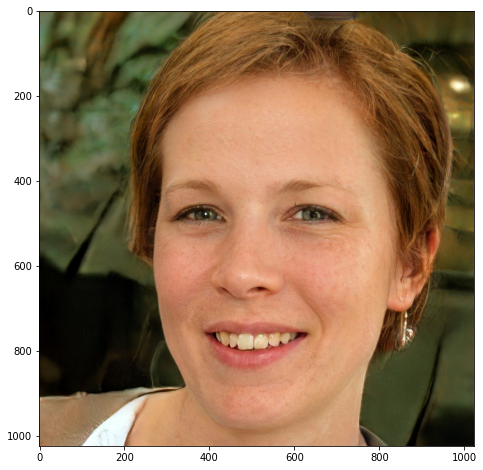

In [18]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras.models import load_model, model_from_json

class FaceUNMASKER:
    
  def __init__(self):
    self.path = 'drive/My Drive/Colab Notebooks/imageUNMASKER/'
    self.outputs_path = os.path.join(self.path, 'outputs/')
    self.model_path   = os.path.join(self.outputs_path, 'saved_model.h5')
    self.resize       = (256, 256)

  def prepare_image(self, img):
    img = cv2.resize(img, self.resize)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.astype("float64") / 255.0
    img = np.asarray(img).reshape(-1, 256, 256, 1)
    return img

  def run(self, imgdir):
    saved_model = load_model(self.model_path)

    orig_img = cv2.imread(os.path.join(self.path, image_dir))
    img = self.prepare_image(orig_img)

    prediction = saved_model.predict(img)[0]
    print ("Fake probability: " + "{:.2%}".format(prediction[0]))
    print ("Real probability: " + "{:.2%}".format(prediction[1]))

    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,8))
    plt.imshow(orig_img)

    if np.argmax(prediction) == 0:
      print('Fake Image')
    else:
      print('Real Image')


if __name__ == '__main__':
  image_dir = 'dataset-proj/validation/fake/806.jpg'
  FaceUNMASKER().run(imgdir = image_dir)